# Implementation given by Lecturer

In [8]:
# Example of kNN implemented from Scratch in Python
# By Jason Brownlee
#http://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/

#importing functions
import csv
import random
import math
import operator
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier




import csv
import random
import math
import operator

def loadDataset(filename, split, trainingSet=[] , testSet=[]):
	with open(filename, 'r') as csvfile:
	    lines = csv.reader(csvfile)
	    dataset = list(lines)
	    for x in range(len(dataset)-1):
	        for y in range(4):
	            dataset[x][y] = float(dataset[x][y])
	        if random.random() < split:
	            trainingSet.append(dataset[x])
	        else:
	            testSet.append(dataset[x])


def euclideanDistance(instance1, instance2, length):
	distance = 0
	for x in range(length):
		distance += pow((instance1[x] - instance2[x]), 2)
	return math.sqrt(distance)

def getNeighbors(trainingSet, testInstance, k):
	distances = []
	length = len(testInstance)-1
	for x in range(len(trainingSet)):
		dist = euclideanDistance(testInstance, trainingSet[x], length)
		distances.append((trainingSet[x], dist))
	distances.sort(key=operator.itemgetter(1))
	neighbors = []
	for x in range(k):
		neighbors.append(distances[x][0])
	return neighbors

def getResponse(neighbors):
	classVotes = {}
	for x in range(len(neighbors)):
		response = neighbors[x][-1]
		if response in classVotes:
			classVotes[response] += 1
		else:
			classVotes[response] = 1
	sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
	return sortedVotes[0][0]

def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x][-1] == predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0

In [199]:
def question_one_one():

    #split_array = [0.18*1, 0.18*2, 0.18*3, 0.18*4, 0.90]
    split_array=[0.36]
    
    #split = 0.67
    # generate predictions
    k_array = [2, 4, 6, 8,10,12,14,16,18,20,22]
    final_accuracy = defaultdict(dict)
    #k = 2
    
    for _el in split_array:
        trainingSet, testSet=[], []
        split = _el
        print(f"For split_value - {split}")
        loadDataset('iris.csv', split, trainingSet, testSet)
        print('Train set: ' + repr(len(trainingSet)))
        print('Test set: ' + repr(len(testSet)))
        i = 0
        for ele in k_array:
            
            predictions=[]
            k=ele
            
            print(f"k - {k}")
            
            for x in range(len(testSet)):
                neighbors = getNeighbors(trainingSet, testSet[x], k) #get k closest neighors
                result = getResponse(neighbors) #returns the predicted class
                predictions+=[result] #append the result to another array

            accuracy = getAccuracy(testSet, predictions)
            final_accuracy[split][k] = accuracy

                    
                    
    print(final_accuracy)
    
    resultant_df = pd.DataFrame(final_accuracy)
    display(resultant_df)
    fig, ax1 = plt.subplots()
    fig.set_size_inches(10, 7)
    ax1.set_xlabel('k Value')
    ax1.set_ylabel('Accuracy')
    ax1.set_title('k Value vs Accuracy for split=0.36')
    ax1.tick_params(axis='both', which='major', labelsize=15)
    ax1.tick_params(axis='both', which='minor', labelsize=12)
    plt.plot(resultant_df, linewidth = 3, marker = 'o', markersize = 6)
    plt.xticks([2*x for x in range(1,12)]) 
    plt.legend(['split=0.36'])
    plt.show()
    plt.savefig('k_vs_accuracy.png')

In [168]:
def question_one_two():

    split_array = [0.18*1, 0.18*2, 0.18*3, 0.18*4, 0.90]
    
    #split = 0.67
    # generate predictions
    k_array = [6]
    final_accuracy = defaultdict(dict)
    #k = 2
    
    for _el in split_array:
        trainingSet, testSet=[], []
        split = _el
        print(f"For split_value - {split}")
        loadDataset('iris.csv', split, trainingSet, testSet)
        print('Train set: ' + repr(len(trainingSet)))
        print('Test set: ' + repr(len(testSet)))
        i = 0
        for ele in k_array:
            
            predictions=[]
            k=ele
            
            print(f"k - {k}")
            
            for x in range(len(testSet)):
                neighbors = getNeighbors(trainingSet, testSet[x], k) #get k closest neighors
                result = getResponse(neighbors) #returns the predicted class
                predictions+=[result] #append the result to another array

            accuracy = getAccuracy(testSet, predictions)
            final_accuracy[split][k] = accuracy

                    
                    
    print(final_accuracy)
    
    resultant_df = pd.DataFrame(final_accuracy).T
    display(resultant_df)
    fig, ax1 = plt.subplots()
    fig.set_size_inches(10, 7)
    ax1.set_xlabel('Split Value')
    ax1.set_ylabel('Accuracy')
    ax1.set_title(f'Split Value vs Accuracy for k=8')
    ax1.tick_params(axis='both', which='major', labelsize=15)
    ax1.tick_params(axis='both', which='minor', labelsize=12)
    plt.plot(resultant_df, linewidth = 3, marker = 'o', markersize = 6)
    plt.xticks(split_array) 
    plt.legend(['k=8'])
    plt.show()
    plt.savefig('split_vs_accuracy.png')

In [38]:
plt.style.use('ggplot')

In [208]:
def equal_index_array(l1,l2):
    
    bool_array=[]
    
    for pos in range(len(l1)):
        bool_array+=[l1[pos]==l2[pos]]
        
    return bool_array


def model_metrics(testActualVal, predictions,verbose=True):
    """A function to get Metrics for a Model
    
    Note: This is a function I wrote for the Research Practicum: 
    https://github.com/Team10UCD/Frontend/blob/cc12998790b7207a859d5089e10f085a65586294/flask/Data_Analytics/Model_Analytics/Route102_sample/02_local_ModelExplorationAndFeatureSelection_Route102.ipynb"""
    
    try:
        accuracy=metrics.accuracy_score(testActualVal, predictions)
    except:
        accuracy=None
        pass
    
    try:
        confusion_matrix=metrics.confusion_matrix(testActualVal, predictions)
    except:
        confusion_matrix=None
        pass
        
    try:
        classification_rep=metrics.classification_report(testActualVal, predictions,output_dict=True)
    except:
        classification_rep=None
        pass
    
    if verbose:
        
        try:
            print("----DETAIL----")
            print("\n\nAccuracy: \n")
            display(accuracy)
            print("\n\nConfusion matrix: \n")
            display(confusion_matrix)
            print("\n\nClassification report:\n ")
            display(classification_rep)
            
        except:
            print("----DETAIL----")
            print("\n\nAccuracy: \n", accuracy)
            print("\n\nConfusion matrix: \n", confusion_matrix)
            print("\n\nClassification report:\n ", classification_rep)
            
    
    result_dict={}
    result_dict['Accuracy']=accuracy
    result_dict['Confusion']=confusion_matrix
    result_dict['ClassificationRep']=classification_rep
    return result_dict



def equal_index_array(l1,l2):
    
    bool_array=[]
    
    for pos in range(len(l1)):
        bool_array+=[l1[pos]==l2[pos]]
        
    return bool_array


def model_metrics(testActualVal, predictions,verbose=True):
    """A function to get Metrics for a Model
    
    Note: This is a function I wrote for the Research Practicum: 
    https://github.com/Team10UCD/Frontend/blob/cc12998790b7207a859d5089e10f085a65586294/flask/Data_Analytics/Model_Analytics/Route102_sample/02_local_ModelExplorationAndFeatureSelection_Route102.ipynb"""
    
    try:
        accuracy=metrics.accuracy_score(testActualVal, predictions)
    except:
        accuracy=None
        pass
    
    try:
        confusion_matrix=metrics.confusion_matrix(testActualVal, predictions)
    except:
        confusion_matrix=None
        pass
        
    try:
        classification_rep=metrics.classification_report(testActualVal, predictions,output_dict=True)
    except:
        classification_rep=None
        pass
    
    if verbose:
        
        try:
            print("----DETAIL----")
            print("\n\nAccuracy: \n")
            display(accuracy)
            print("\n\nConfusion matrix: \n")
            display(confusion_matrix)
            print("\n\nClassification report:\n ")
            display(classification_rep)
            
        except:
            print("----DETAIL----")
            print("\n\nAccuracy: \n", accuracy)
            print("\n\nConfusion matrix: \n", confusion_matrix)
            print("\n\nClassification report:\n ", classification_rep)
            
    
    result_dict={}
    result_dict['Accuracy']=accuracy
    result_dict['Confusion']=confusion_matrix
    result_dict['ClassificationRep']=classification_rep
    return result_dict


def create_knn(X,y,neighbours=round(np.sqrt(len(X)),0),plot_comp=True,scaler='Standard', random_state=14395076,assess=True, test_size=0.33,verbose=True):
    """Create a model using SK's Naive Bayes."""
    
    
    print("""
-
{}-Nearest Neighbours:
-
          
          """.format(neighbours))
    
    X_train, X_test, y_train, y_test = train_test_split(X 
                                                        ,y
                                                        ,random_state=random_state
                                                        ,test_size=test_size)
    
    if scaler=='Standard':
        scaler = StandardScaler()
    elif scaler=='MinMax':    
        scaler = MinMaxScaler()
    elif scaler==None:
        pass
    else:
        raise ValueError("Need to implemenet your scaler - Choose Standard or MinMax")
    
    if scaler is not None:
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    
    start=time.perf_counter()
    
    #Create the DT Regression
    model=KNeighborsClassifier(n_neighbors=neighbours, 
                     weights='uniform', 
                     algorithm='auto', 
                     leaf_size=30, 
                     p=2, 
                     metric='minkowski', 
                     metric_params=None, 
                     n_jobs=None)

    #Fit the data
    model.fit(X_train,y_train)
   
    
    #Check the predictions
    predictions = model.predict(X_test)
    end=time.perf_counter()
    
    print("Total Time to Classify: {}".format(end-start))
    
    
    #Results
    pred_vs_act_df=pd.DataFrame({'Actual':y_test
                                 ,'PredictionClass':predictions
                                ,'Diff':equal_index_array(l1=y_test,l2=predictions)})
    
    model_metric=model_metrics(testActualVal=y_test, predictions=predictions, verbose=True)
    
    
    scores = cross_val_score(KNeighborsClassifier(n_neighbors=neighbours, 
                     weights='uniform', 
                     algorithm='auto', 
                     leaf_size=30, 
                     p=2, 
                     metric='minkowski', 
                     metric_params=None, 
                     n_jobs=None), X, y, scoring='accuracy', cv=5)
    print(scores)

    cv_rmse = scores**0.5
    print("Avg Accuracy score over 5 folds: \n", np.mean(cv_rmse))
    print("Stddev Accuracy score over 5 folds: \n", np.std(cv_rmse))
    
    model_metric['ClassificationRep']['Classification Time']=end-start
    result_dict={}
    result_dict['k']=neighbours
    result_dict['Split']=test_size
    result_dict['Model']=model
    result_dict['Classification_Time']=end-start
    result_dict['Actual vs Prediction']=pred_vs_act_df
    result_dict['Accuracy']=model_metric['Accuracy']
    result_dict['Confusion']=model_metric['Confusion']
    result_dict['ClassificationRep']=model_metric['ClassificationRep']
    result_dict['CrossVal_Acc_Mean']=np.mean(cv_rmse)
    result_dict['CrossVal_Acc_Mean']=np.std(cv_rmse)
    result_dict['CV']=scores

    return result_dict




def create_model(X,y,neighbours=2,scaler=None,random_state=14395076,plot_comp=True,assess=True,test_size=0.33, verbose=True,mod_type='kNN'):
    """A wrapper to call the create model function"""

    
    if mod_type=='kNN':
        mod_result=create_knn(X
                              ,y
                              ,neighbours=neighbours
                              ,plot_comp=plot_comp
                              ,scaler='Standard'
                              ,random_state=random_state
                              ,assess=assess
                              ,test_size=test_size
                              ,verbose=verbose)
        
        return mod_result
    
    else:
        print("Sorry, I've not built that yet.")
        raise ValueError("Must be My Naive Bayes or SK Naive Bayes")

For split_value - 0.36
Train set: 57
Test set: 92
k - 2
k - 4
k - 6
k - 8
k - 10
k - 12
k - 14
k - 16
k - 18
k - 20
k - 22
defaultdict(<class 'dict'>, {0.36: {2: 95.65217391304348, 4: 96.73913043478261, 6: 98.91304347826086, 8: 97.82608695652173, 10: 96.73913043478261, 12: 95.65217391304348, 14: 95.65217391304348, 16: 94.56521739130434, 18: 94.56521739130434, 20: 93.47826086956522, 22: 94.56521739130434}})


,0.36
2,95.652174
4,96.739130
6,98.913043
8,97.826087
10,96.739130
12,95.652174
14,95.652174
16,94.565217
18,94.565217
20,93.478261


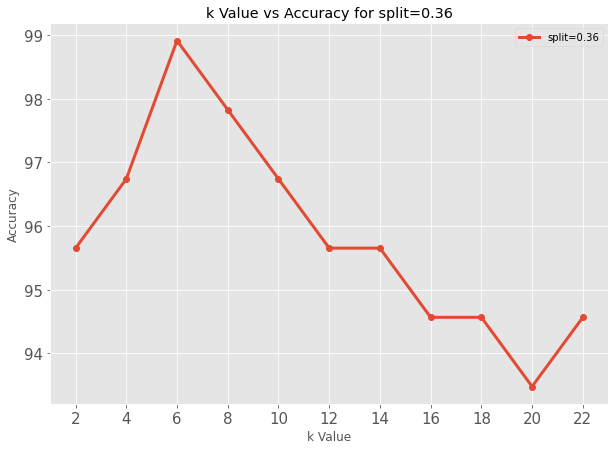

<Figure size 432x288 with 0 Axes>

In [167]:
question_one_one()

For split_value - 0.18
Train set: 22
Test set: 127
k - 6
For split_value - 0.36
Train set: 55
Test set: 94
k - 6
For split_value - 0.54
Train set: 84
Test set: 65
k - 6
For split_value - 0.72
Train set: 111
Test set: 38
k - 6
For split_value - 0.9
Train set: 137
Test set: 12
k - 6
defaultdict(<class 'dict'>, {0.18: {6: 93.7007874015748}, 0.36: {6: 95.74468085106383}, 0.54: {6: 95.38461538461539}, 0.72: {6: 97.36842105263158}, 0.9: {6: 100.0}})


,6
0.18,93.700787
0.36,95.744681
0.54,95.384615
0.72,97.368421
0.90,100.000000


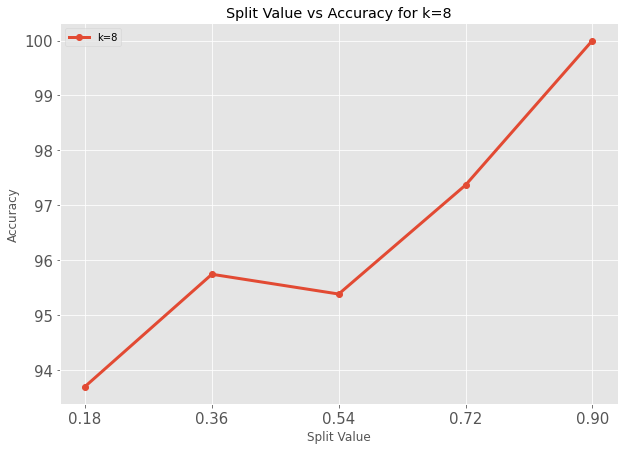

<Figure size 432x288 with 0 Axes>

In [169]:
question_one_two()

# K Nearest Neighbours SKLearn

In [158]:

#import nltk as nl
import sklearn as sk
#import xgboost as xg
#import pymc3 as pymc
#import sympy as sym


from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.neighbors import *
from sklearn.linear_model import LinearRegression
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier


#from sklearn.tree import export_graphviz
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier


######---------BEGIN
#      SQL
######--------END



######---------BEGIN
#     GENERAL
######--------END

import pandas as pd
import numpy as np
import os
import sys
import time

######---------BEGIN
#     DATA VIS
######--------END

import seaborn as sns
import matplotlib as mp
#from bokeh import *
#from dash import *

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.dates as mdates


In [244]:
def question_one_models():
    df=pd.read_csv('iris.csv',header=None)

    test_size=0.36

    X=df[[0,1,2,3]].values
    y=df.pop(4).values

    split_dict=dict()
    k_dict=dict()

    split_array = [0.18*1, 0.18*2, 0.18*3, 0.18*4, 0.90]

    for split in split_array:
        split_dict[split]=create_model(X=X
                     ,y=y
                     ,neighbours=int(round(np.sqrt(len(X)),0))
                     ,scaler=None
                     ,random_state=14395076
                     ,plot_comp=True
                     ,assess=True
                     ,test_size=split
                     , verbose=True
                     ,mod_type='kNN')


    k_array=[2, 4, 6, 8,10,12,14,16,18,20,22]

    for k in k_array:
        k_dict[k]=create_model(X=X
                     ,y=y
                     ,neighbours=k
                     ,scaler=None
                     ,random_state=14395076
                     ,plot_comp=True
                     ,assess=True
                     ,test_size=0.36
                     ,verbose=True
                     ,mod_type='kNN')
        
        
    return split_dict,k_dict

In [266]:
def question_one_plots(split_dict,k_dict):
    
    vals=dict()
    
    for k in k_dict:
        vals[k]=np.mean((k_dict[k]['CV']))
        
    k_df=pd.DataFrame(vals,index=[0.36])
    
    resultant_df = k_df.T
    display(resultant_df)
    
    fig, ax1 = plt.subplots()
    fig.set_size_inches(10, 7)
    ax1.set_xlabel('k Value')
    ax1.set_ylabel('Accuracy')
    ax1.set_title(f'k Value vs 5-Fold Cross Val Accuracy for split={1-0.36}')
    ax1.tick_params(axis='both', which='major', labelsize=15)
    ax1.tick_params(axis='both', which='minor', labelsize=12)
    plt.plot(resultant_df, linewidth = 3, marker = 'o', markersize = 6)
    plt.xticks([2*x for x in range(1,12)]) 
    plt.legend(['split={}'.format(1-0.36)])
    plt.savefig('k_vs_accuracy.png')
    plt.show()
    
    
    ###Second DF
    s_vals=dict()
    
    for s in split_dict:
        s_vals[1-s]=split_dict[s]['Accuracy']
        
    s_df=pd.DataFrame(s_vals,index=[12]).T
    
    resultant_df = s_df
    display(resultant_df)
    
    display(resultant_df)
    fig, ax1 = plt.subplots()
    fig.set_size_inches(10, 7)
    ax1.set_xlabel('Split Value')
    ax1.set_ylabel('Accuracy')
    ax1.set_title(f'Split Value vs Accuracy for k=12')
    ax1.tick_params(axis='both', which='major', labelsize=15)
    ax1.tick_params(axis='both', which='minor', labelsize=12)
    plt.plot(resultant_df, linewidth = 3, marker = 'o', markersize = 6)
    plt.xticks(resultant_df.index) 
    plt.legend(['k=12'])
    plt.savefig('split_vs_accuracy.png')
    plt.show()
    
    
    
    

In [267]:
def question_one():
    split_dict,k_dict=question_one_models()
    question_one_plots(split_dict,k_dict)
    return split_dict,k_dict


-
12-Nearest Neighbours:
-
          
          
Total Time to Classify: 0.0035032079995289678
----DETAIL----


Accuracy: 



0.9629629629629629



Confusion matrix: 



array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0,  7]])



Classification report:
 


{'Iris-setosa': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 10},
 'Iris-versicolor': {'precision': 1.0,
  'recall': 0.9,
  'f1-score': 0.9473684210526316,
  'support': 10},
 'Iris-virginica': {'precision': 0.875,
  'recall': 1.0,
  'f1-score': 0.9333333333333333,
  'support': 7},
 'accuracy': 0.9629629629629629,
 'macro avg': {'precision': 0.9583333333333334,
  'recall': 0.9666666666666667,
  'f1-score': 0.960233918128655,
  'support': 27},
 'weighted avg': {'precision': 0.9675925925925926,
  'recall': 0.9629629629629629,
  'f1-score': 0.9632228719948017,
  'support': 27}}

[0.93333333 1.         1.         0.96666667 1.        ]
Avg Accuracy score over 5 folds: 
 0.9898567726658942
Stddev Accuracy score over 5 folds: 
 0.013548786198780497

-
12-Nearest Neighbours:
-
          
          
Total Time to Classify: 0.0023775839999871096
----DETAIL----


Accuracy: 



0.9444444444444444



Confusion matrix: 



array([[16,  0,  0],
       [ 0, 19,  2],
       [ 0,  1, 16]])



Classification report:
 


{'Iris-setosa': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 16},
 'Iris-versicolor': {'precision': 0.95,
  'recall': 0.9047619047619048,
  'f1-score': 0.9268292682926829,
  'support': 21},
 'Iris-virginica': {'precision': 0.8888888888888888,
  'recall': 0.9411764705882353,
  'f1-score': 0.9142857142857143,
  'support': 17},
 'accuracy': 0.9444444444444444,
 'macro avg': {'precision': 0.9462962962962962,
  'recall': 0.9486461251167132,
  'f1-score': 0.9470383275261324,
  'support': 54},
 'weighted avg': {'precision': 0.9455761316872429,
  'recall': 0.9444444444444444,
  'f1-score': 0.9445605884630275,
  'support': 54}}

[0.93333333 1.         1.         0.96666667 1.        ]
Avg Accuracy score over 5 folds: 
 0.9898567726658942
Stddev Accuracy score over 5 folds: 
 0.013548786198780497

-
12-Nearest Neighbours:
-
          
          
Total Time to Classify: 0.0024983749990497017
----DETAIL----


Accuracy: 



0.9259259259259259



Confusion matrix: 



array([[24,  0,  0],
       [ 0, 24,  4],
       [ 0,  2, 27]])



Classification report:
 


{'Iris-setosa': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 24},
 'Iris-versicolor': {'precision': 0.9230769230769231,
  'recall': 0.8571428571428571,
  'f1-score': 0.888888888888889,
  'support': 28},
 'Iris-virginica': {'precision': 0.8709677419354839,
  'recall': 0.9310344827586207,
  'f1-score': 0.9,
  'support': 29},
 'accuracy': 0.9259259259259259,
 'macro avg': {'precision': 0.9313482216708023,
  'recall': 0.9293924466338259,
  'f1-score': 0.9296296296296296,
  'support': 81},
 'weighted avg': {'precision': 0.9272125723738627,
  'recall': 0.9259259259259259,
  'f1-score': 0.9257887517146776,
  'support': 81}}

[0.93333333 1.         1.         0.96666667 1.        ]
Avg Accuracy score over 5 folds: 
 0.9898567726658942
Stddev Accuracy score over 5 folds: 
 0.013548786198780497

-
12-Nearest Neighbours:
-
          
          
Total Time to Classify: 0.003038750000996515
----DETAIL----


Accuracy: 



0.8796296296296297



Confusion matrix: 



array([[33,  0,  0],
       [ 0, 36,  0],
       [ 0, 13, 26]])



Classification report:
 


{'Iris-setosa': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 33},
 'Iris-versicolor': {'precision': 0.7346938775510204,
  'recall': 1.0,
  'f1-score': 0.8470588235294119,
  'support': 36},
 'Iris-virginica': {'precision': 1.0,
  'recall': 0.6666666666666666,
  'f1-score': 0.8,
  'support': 39},
 'accuracy': 0.8796296296296297,
 'macro avg': {'precision': 0.9115646258503401,
  'recall': 0.8888888888888888,
  'f1-score': 0.8823529411764707,
  'support': 108},
 'weighted avg': {'precision': 0.9115646258503401,
  'recall': 0.8796296296296297,
  'f1-score': 0.8767973856209151,
  'support': 108}}

[0.93333333 1.         1.         0.96666667 1.        ]
Avg Accuracy score over 5 folds: 
 0.9898567726658942
Stddev Accuracy score over 5 folds: 
 0.013548786198780497

-
12-Nearest Neighbours:
-
          
          
Total Time to Classify: 0.003910666000592755
----DETAIL----


Accuracy: 



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.32592592592592595



Confusion matrix: 



array([[ 1, 44,  0],
       [ 0, 43,  0],
       [ 0, 47,  0]])



Classification report:
 


{'Iris-setosa': {'precision': 1.0,
  'recall': 0.022222222222222223,
  'f1-score': 0.04347826086956522,
  'support': 45},
 'Iris-versicolor': {'precision': 0.3208955223880597,
  'recall': 1.0,
  'f1-score': 0.4858757062146893,
  'support': 43},
 'Iris-virginica': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 47},
 'accuracy': 0.32592592592592595,
 'macro avg': {'precision': 0.44029850746268656,
  'recall': 0.34074074074074073,
  'f1-score': 0.17645132236141817,
  'support': 135},
 'weighted avg': {'precision': 0.4355444997236042,
  'recall': 0.32592592592592595,
  'f1-score': 0.1692531637508302,
  'support': 135}}

[0.93333333 1.         1.         0.96666667 1.        ]
Avg Accuracy score over 5 folds: 
 0.9898567726658942
Stddev Accuracy score over 5 folds: 
 0.013548786198780497

-
2-Nearest Neighbours:
-
          
          
Total Time to Classify: 0.001924874999531312
----DETAIL----


Accuracy: 



0.9444444444444444



Confusion matrix: 



array([[16,  0,  0],
       [ 0, 19,  2],
       [ 0,  1, 16]])



Classification report:
 


{'Iris-setosa': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 16},
 'Iris-versicolor': {'precision': 0.95,
  'recall': 0.9047619047619048,
  'f1-score': 0.9268292682926829,
  'support': 21},
 'Iris-virginica': {'precision': 0.8888888888888888,
  'recall': 0.9411764705882353,
  'f1-score': 0.9142857142857143,
  'support': 17},
 'accuracy': 0.9444444444444444,
 'macro avg': {'precision': 0.9462962962962962,
  'recall': 0.9486461251167132,
  'f1-score': 0.9470383275261324,
  'support': 54},
 'weighted avg': {'precision': 0.9455761316872429,
  'recall': 0.9444444444444444,
  'f1-score': 0.9445605884630275,
  'support': 54}}

[0.96666667 0.93333333 0.93333333 0.9        1.        ]
Avg Accuracy score over 5 folds: 
 0.9728117888918562
Stddev Accuracy score over 5 folds: 
 0.017432442734551096

-
4-Nearest Neighbours:
-
          
          
Total Time to Classify: 0.0023305839986278443
----DETAIL----


Accuracy: 



0.9259259259259259



Confusion matrix: 



array([[16,  0,  0],
       [ 0, 18,  3],
       [ 0,  1, 16]])



Classification report:
 


{'Iris-setosa': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 16},
 'Iris-versicolor': {'precision': 0.9473684210526315,
  'recall': 0.8571428571428571,
  'f1-score': 0.9,
  'support': 21},
 'Iris-virginica': {'precision': 0.8421052631578947,
  'recall': 0.9411764705882353,
  'f1-score': 0.8888888888888888,
  'support': 17},
 'accuracy': 0.9259259259259259,
 'macro avg': {'precision': 0.9298245614035087,
  'recall': 0.9327731092436974,
  'f1-score': 0.9296296296296296,
  'support': 54},
 'weighted avg': {'precision': 0.9298245614035087,
  'recall': 0.9259259259259259,
  'f1-score': 0.9261316872427985,
  'support': 54}}

[0.96666667 0.96666667 0.96666667 0.96666667 1.        ]
Avg Accuracy score over 5 folds: 
 0.98655366420014
Stddev Accuracy score over 5 folds: 
 0.006723167899929994

-
6-Nearest Neighbours:
-
          
          
Total Time to Classify: 0.0020419579996087123
----DETAIL----


Accuracy: 



0.9444444444444444



Confusion matrix: 



array([[16,  0,  0],
       [ 0, 19,  2],
       [ 0,  1, 16]])



Classification report:
 


{'Iris-setosa': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 16},
 'Iris-versicolor': {'precision': 0.95,
  'recall': 0.9047619047619048,
  'f1-score': 0.9268292682926829,
  'support': 21},
 'Iris-virginica': {'precision': 0.8888888888888888,
  'recall': 0.9411764705882353,
  'f1-score': 0.9142857142857143,
  'support': 17},
 'accuracy': 0.9444444444444444,
 'macro avg': {'precision': 0.9462962962962962,
  'recall': 0.9486461251167132,
  'f1-score': 0.9470383275261324,
  'support': 54},
 'weighted avg': {'precision': 0.9455761316872429,
  'recall': 0.9444444444444444,
  'f1-score': 0.9445605884630275,
  'support': 54}}

[0.96666667 1.         0.96666667 0.96666667 1.        ]
Avg Accuracy score over 5 folds: 
 0.989915248150105
Stddev Accuracy score over 5 folds: 
 0.00823416540494382

-
8-Nearest Neighbours:
-
          
          
Total Time to Classify: 0.0020917080000799615
----DETAIL----


Accuracy: 



0.9444444444444444



Confusion matrix: 



array([[16,  0,  0],
       [ 0, 19,  2],
       [ 0,  1, 16]])



Classification report:
 


{'Iris-setosa': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 16},
 'Iris-versicolor': {'precision': 0.95,
  'recall': 0.9047619047619048,
  'f1-score': 0.9268292682926829,
  'support': 21},
 'Iris-virginica': {'precision': 0.8888888888888888,
  'recall': 0.9411764705882353,
  'f1-score': 0.9142857142857143,
  'support': 17},
 'accuracy': 0.9444444444444444,
 'macro avg': {'precision': 0.9462962962962962,
  'recall': 0.9486461251167132,
  'f1-score': 0.9470383275261324,
  'support': 54},
 'weighted avg': {'precision': 0.9455761316872429,
  'recall': 0.9444444444444444,
  'f1-score': 0.9445605884630275,
  'support': 54}}

[0.96666667 1.         0.93333333 0.93333333 1.        ]
Avg Accuracy score over 5 folds: 
 0.9830751292817533
Stddev Accuracy score over 5 folds: 
 0.015164328350789515

-
10-Nearest Neighbours:
-
          
          
Total Time to Classify: 0.004789915999936056
----DETAIL----


Accuracy: 



0.9444444444444444



Confusion matrix: 



array([[16,  0,  0],
       [ 0, 19,  2],
       [ 0,  1, 16]])



Classification report:
 


{'Iris-setosa': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 16},
 'Iris-versicolor': {'precision': 0.95,
  'recall': 0.9047619047619048,
  'f1-score': 0.9268292682926829,
  'support': 21},
 'Iris-virginica': {'precision': 0.8888888888888888,
  'recall': 0.9411764705882353,
  'f1-score': 0.9142857142857143,
  'support': 17},
 'accuracy': 0.9444444444444444,
 'macro avg': {'precision': 0.9462962962962962,
  'recall': 0.9486461251167132,
  'f1-score': 0.9470383275261324,
  'support': 54},
 'weighted avg': {'precision': 0.9455761316872429,
  'recall': 0.9444444444444444,
  'f1-score': 0.9445605884630275,
  'support': 54}}

[0.96666667 1.         1.         0.93333333 1.        ]
Avg Accuracy score over 5 folds: 
 0.9898567726658942
Stddev Accuracy score over 5 folds: 
 0.013548786198780497

-
12-Nearest Neighbours:
-
          
          
Total Time to Classify: 0.004562457999782055
----DETAIL----


Accuracy: 



0.9444444444444444



Confusion matrix: 



array([[16,  0,  0],
       [ 0, 19,  2],
       [ 0,  1, 16]])



Classification report:
 


{'Iris-setosa': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 16},
 'Iris-versicolor': {'precision': 0.95,
  'recall': 0.9047619047619048,
  'f1-score': 0.9268292682926829,
  'support': 21},
 'Iris-virginica': {'precision': 0.8888888888888888,
  'recall': 0.9411764705882353,
  'f1-score': 0.9142857142857143,
  'support': 17},
 'accuracy': 0.9444444444444444,
 'macro avg': {'precision': 0.9462962962962962,
  'recall': 0.9486461251167132,
  'f1-score': 0.9470383275261324,
  'support': 54},
 'weighted avg': {'precision': 0.9455761316872429,
  'recall': 0.9444444444444444,
  'f1-score': 0.9445605884630275,
  'support': 54}}

[0.93333333 1.         1.         0.96666667 1.        ]
Avg Accuracy score over 5 folds: 
 0.9898567726658942
Stddev Accuracy score over 5 folds: 
 0.013548786198780497

-
14-Nearest Neighbours:
-
          
          
Total Time to Classify: 0.002565958000559476
----DETAIL----


Accuracy: 



0.9444444444444444



Confusion matrix: 



array([[16,  0,  0],
       [ 0, 19,  2],
       [ 0,  1, 16]])



Classification report:
 


{'Iris-setosa': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 16},
 'Iris-versicolor': {'precision': 0.95,
  'recall': 0.9047619047619048,
  'f1-score': 0.9268292682926829,
  'support': 21},
 'Iris-virginica': {'precision': 0.8888888888888888,
  'recall': 0.9411764705882353,
  'f1-score': 0.9142857142857143,
  'support': 17},
 'accuracy': 0.9444444444444444,
 'macro avg': {'precision': 0.9462962962962962,
  'recall': 0.9486461251167132,
  'f1-score': 0.9470383275261324,
  'support': 54},
 'weighted avg': {'precision': 0.9455761316872429,
  'recall': 0.9444444444444444,
  'f1-score': 0.9445605884630275,
  'support': 54}}

[0.93333333 1.         0.96666667 0.93333333 1.        ]
Avg Accuracy score over 5 folds: 
 0.9830751292817533
Stddev Accuracy score over 5 folds: 
 0.015164328350789515

-
16-Nearest Neighbours:
-
          
          
Total Time to Classify: 0.0024309170003107283
----DETAIL----


Accuracy: 



0.9074074074074074



Confusion matrix: 



array([[16,  0,  0],
       [ 0, 17,  4],
       [ 0,  1, 16]])



Classification report:
 


{'Iris-setosa': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 16},
 'Iris-versicolor': {'precision': 0.9444444444444444,
  'recall': 0.8095238095238095,
  'f1-score': 0.8717948717948718,
  'support': 21},
 'Iris-virginica': {'precision': 0.8,
  'recall': 0.9411764705882353,
  'f1-score': 0.8648648648648648,
  'support': 17},
 'accuracy': 0.9074074074074074,
 'macro avg': {'precision': 0.9148148148148149,
  'recall': 0.9169000933706816,
  'f1-score': 0.9122199122199123,
  'support': 54},
 'weighted avg': {'precision': 0.9154320987654321,
  'recall': 0.9074074074074074,
  'f1-score': 0.9075999075999076,
  'support': 54}}

[0.93333333 1.         0.93333333 0.96666667 1.        ]
Avg Accuracy score over 5 folds: 
 0.9830751292817533
Stddev Accuracy score over 5 folds: 
 0.015164328350789515

-
18-Nearest Neighbours:
-
          
          
Total Time to Classify: 0.004418874999828404
----DETAIL----


Accuracy: 



0.8888888888888888



Confusion matrix: 



array([[16,  0,  0],
       [ 0, 16,  5],
       [ 0,  1, 16]])



Classification report:
 


{'Iris-setosa': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 16},
 'Iris-versicolor': {'precision': 0.9411764705882353,
  'recall': 0.7619047619047619,
  'f1-score': 0.8421052631578947,
  'support': 21},
 'Iris-virginica': {'precision': 0.7619047619047619,
  'recall': 0.9411764705882353,
  'f1-score': 0.8421052631578947,
  'support': 17},
 'accuracy': 0.8888888888888888,
 'macro avg': {'precision': 0.9010270774976658,
  'recall': 0.9010270774976658,
  'f1-score': 0.8947368421052632,
  'support': 54},
 'weighted avg': {'precision': 0.9021682747172943,
  'recall': 0.8888888888888888,
  'f1-score': 0.8888888888888888,
  'support': 54}}

[0.93333333 1.         0.96666667 0.93333333 1.        ]
Avg Accuracy score over 5 folds: 
 0.9830751292817533
Stddev Accuracy score over 5 folds: 
 0.015164328350789515

-
20-Nearest Neighbours:
-
          
          
Total Time to Classify: 0.002525165999031742
----DETAIL----


Accuracy: 



0.8888888888888888



Confusion matrix: 



array([[16,  0,  0],
       [ 0, 16,  5],
       [ 0,  1, 16]])



Classification report:
 


{'Iris-setosa': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 16},
 'Iris-versicolor': {'precision': 0.9411764705882353,
  'recall': 0.7619047619047619,
  'f1-score': 0.8421052631578947,
  'support': 21},
 'Iris-virginica': {'precision': 0.7619047619047619,
  'recall': 0.9411764705882353,
  'f1-score': 0.8421052631578947,
  'support': 17},
 'accuracy': 0.8888888888888888,
 'macro avg': {'precision': 0.9010270774976658,
  'recall': 0.9010270774976658,
  'f1-score': 0.8947368421052632,
  'support': 54},
 'weighted avg': {'precision': 0.9021682747172943,
  'recall': 0.8888888888888888,
  'f1-score': 0.8888888888888888,
  'support': 54}}

[0.93333333 1.         0.93333333 0.93333333 1.        ]
Avg Accuracy score over 5 folds: 
 0.9796550698475774
Stddev Accuracy score over 5 folds: 
 0.016611565908666345

-
22-Nearest Neighbours:
-
          
          
Total Time to Classify: 0.0020384580002428265
----DETAIL----


Accuracy: 



0.8888888888888888



Confusion matrix: 



array([[16,  0,  0],
       [ 0, 16,  5],
       [ 0,  1, 16]])



Classification report:
 


{'Iris-setosa': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 16},
 'Iris-versicolor': {'precision': 0.9411764705882353,
  'recall': 0.7619047619047619,
  'f1-score': 0.8421052631578947,
  'support': 21},
 'Iris-virginica': {'precision': 0.7619047619047619,
  'recall': 0.9411764705882353,
  'f1-score': 0.8421052631578947,
  'support': 17},
 'accuracy': 0.8888888888888888,
 'macro avg': {'precision': 0.9010270774976658,
  'recall': 0.9010270774976658,
  'f1-score': 0.8947368421052632,
  'support': 54},
 'weighted avg': {'precision': 0.9021682747172943,
  'recall': 0.8888888888888888,
  'f1-score': 0.8888888888888888,
  'support': 54}}

[0.93333333 1.         0.93333333 0.93333333 1.        ]
Avg Accuracy score over 5 folds: 
 0.9796550698475774
Stddev Accuracy score over 5 folds: 
 0.016611565908666345


,0.36
2,0.946667
4,0.973333
6,0.980000
8,0.966667
10,0.980000
12,0.980000
14,0.966667
16,0.966667
18,0.966667
20,0.960000


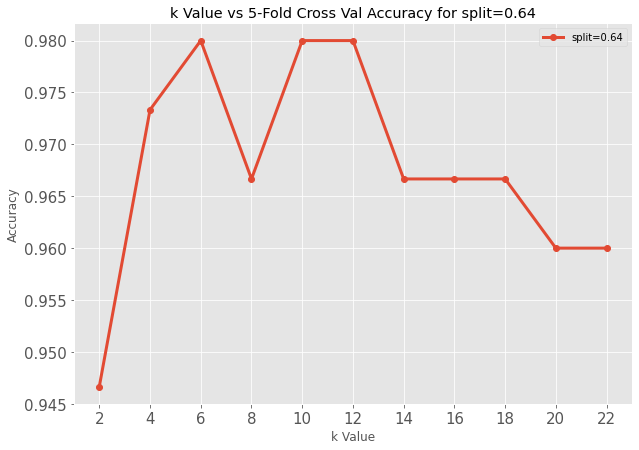

,12
0.82,0.962963
0.64,0.944444
0.46,0.925926
0.28,0.879630
0.10,0.325926


,12
0.82,0.962963
0.64,0.944444
0.46,0.925926
0.28,0.879630
0.10,0.325926


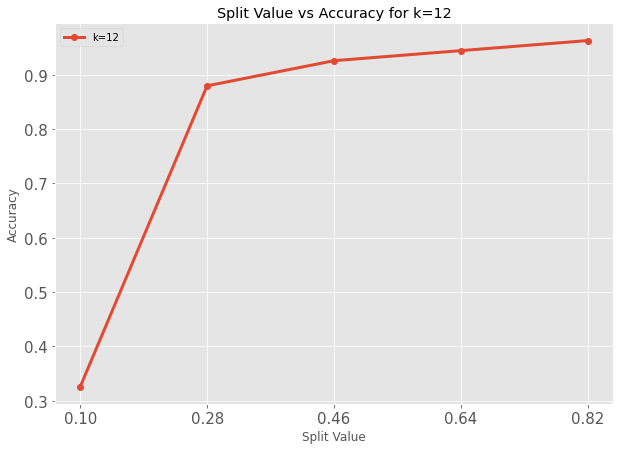

In [268]:
split_dict,k_dict=question_one()

In [224]:
df=pd.read_csv('iris.csv',header=None)

test_size=0.36

X=df[[0,1,2,3]].values
y=df.pop(4).values

split_dict=dict()
k_dict=dict()

split_array = [0.18*1, 0.18*2, 0.18*3, 0.18*4, 0.90]

for split in split_array:
    split_dict[split]=create_model(X=X
                 ,y=y
                 ,neighbours=12
                 ,scaler=None
                 ,random_state=14395076
                 ,plot_comp=True
                 ,assess=True
                 ,test_size=split
                 , verbose=True
                 ,mod_type='kNN')
    
    
k_array=[2, 4, 6, 8,10,12,14,16,18,20,22]

for k in k_array:
    k_dict[k]=create_model(X=X
                 ,y=y
                 ,neighbours=k
                 ,scaler=None
                 ,random_state=14395076
                 ,plot_comp=True
                 ,assess=True
                 ,test_size=0.36
                 ,verbose=True
                 ,mod_type='kNN')


-
12-Nearest Neighbours:
-
          
          
Total Time to Classify: 0.0022479170002043247
----DETAIL----


Accuracy: 



0.9629629629629629



Confusion matrix: 



array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0,  7]])



Classification report:
 


{'Iris-setosa': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 10},
 'Iris-versicolor': {'precision': 1.0,
  'recall': 0.9,
  'f1-score': 0.9473684210526316,
  'support': 10},
 'Iris-virginica': {'precision': 0.875,
  'recall': 1.0,
  'f1-score': 0.9333333333333333,
  'support': 7},
 'accuracy': 0.9629629629629629,
 'macro avg': {'precision': 0.9583333333333334,
  'recall': 0.9666666666666667,
  'f1-score': 0.960233918128655,
  'support': 27},
 'weighted avg': {'precision': 0.9675925925925926,
  'recall': 0.9629629629629629,
  'f1-score': 0.9632228719948017,
  'support': 27}}

[0.93333333 1.         1.         0.96666667 1.        ]
Avg Accuracy score over 5 folds: 
 0.9898567726658942
Stddev Accuracy score over 5 folds: 
 0.013548786198780497

-
12-Nearest Neighbours:
-
          
          
Total Time to Classify: 0.001802417000362766
----DETAIL----


Accuracy: 



0.9444444444444444



Confusion matrix: 



array([[16,  0,  0],
       [ 0, 19,  2],
       [ 0,  1, 16]])



Classification report:
 


{'Iris-setosa': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 16},
 'Iris-versicolor': {'precision': 0.95,
  'recall': 0.9047619047619048,
  'f1-score': 0.9268292682926829,
  'support': 21},
 'Iris-virginica': {'precision': 0.8888888888888888,
  'recall': 0.9411764705882353,
  'f1-score': 0.9142857142857143,
  'support': 17},
 'accuracy': 0.9444444444444444,
 'macro avg': {'precision': 0.9462962962962962,
  'recall': 0.9486461251167132,
  'f1-score': 0.9470383275261324,
  'support': 54},
 'weighted avg': {'precision': 0.9455761316872429,
  'recall': 0.9444444444444444,
  'f1-score': 0.9445605884630275,
  'support': 54}}

[0.93333333 1.         1.         0.96666667 1.        ]
Avg Accuracy score over 5 folds: 
 0.9898567726658942
Stddev Accuracy score over 5 folds: 
 0.013548786198780497

-
12-Nearest Neighbours:
-
          
          
Total Time to Classify: 0.003045166999072535
----DETAIL----


Accuracy: 



0.9259259259259259



Confusion matrix: 



array([[24,  0,  0],
       [ 0, 24,  4],
       [ 0,  2, 27]])



Classification report:
 


{'Iris-setosa': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 24},
 'Iris-versicolor': {'precision': 0.9230769230769231,
  'recall': 0.8571428571428571,
  'f1-score': 0.888888888888889,
  'support': 28},
 'Iris-virginica': {'precision': 0.8709677419354839,
  'recall': 0.9310344827586207,
  'f1-score': 0.9,
  'support': 29},
 'accuracy': 0.9259259259259259,
 'macro avg': {'precision': 0.9313482216708023,
  'recall': 0.9293924466338259,
  'f1-score': 0.9296296296296296,
  'support': 81},
 'weighted avg': {'precision': 0.9272125723738627,
  'recall': 0.9259259259259259,
  'f1-score': 0.9257887517146776,
  'support': 81}}

[0.93333333 1.         1.         0.96666667 1.        ]
Avg Accuracy score over 5 folds: 
 0.9898567726658942
Stddev Accuracy score over 5 folds: 
 0.013548786198780497

-
12-Nearest Neighbours:
-
          
          
Total Time to Classify: 0.00505962500028545
----DETAIL----


Accuracy: 



0.8796296296296297



Confusion matrix: 



array([[33,  0,  0],
       [ 0, 36,  0],
       [ 0, 13, 26]])



Classification report:
 


{'Iris-setosa': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 33},
 'Iris-versicolor': {'precision': 0.7346938775510204,
  'recall': 1.0,
  'f1-score': 0.8470588235294119,
  'support': 36},
 'Iris-virginica': {'precision': 1.0,
  'recall': 0.6666666666666666,
  'f1-score': 0.8,
  'support': 39},
 'accuracy': 0.8796296296296297,
 'macro avg': {'precision': 0.9115646258503401,
  'recall': 0.8888888888888888,
  'f1-score': 0.8823529411764707,
  'support': 108},
 'weighted avg': {'precision': 0.9115646258503401,
  'recall': 0.8796296296296297,
  'f1-score': 0.8767973856209151,
  'support': 108}}

[0.93333333 1.         1.         0.96666667 1.        ]
Avg Accuracy score over 5 folds: 
 0.9898567726658942
Stddev Accuracy score over 5 folds: 
 0.013548786198780497

-
12-Nearest Neighbours:
-
          
          
Total Time to Classify: 0.0038508340003318153
----DETAIL----


Accuracy: 



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.32592592592592595



Confusion matrix: 



array([[ 1, 44,  0],
       [ 0, 43,  0],
       [ 0, 47,  0]])



Classification report:
 


{'Iris-setosa': {'precision': 1.0,
  'recall': 0.022222222222222223,
  'f1-score': 0.04347826086956522,
  'support': 45},
 'Iris-versicolor': {'precision': 0.3208955223880597,
  'recall': 1.0,
  'f1-score': 0.4858757062146893,
  'support': 43},
 'Iris-virginica': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 47},
 'accuracy': 0.32592592592592595,
 'macro avg': {'precision': 0.44029850746268656,
  'recall': 0.34074074074074073,
  'f1-score': 0.17645132236141817,
  'support': 135},
 'weighted avg': {'precision': 0.4355444997236042,
  'recall': 0.32592592592592595,
  'f1-score': 0.1692531637508302,
  'support': 135}}

[0.93333333 1.         1.         0.96666667 1.        ]
Avg Accuracy score over 5 folds: 
 0.9898567726658942
Stddev Accuracy score over 5 folds: 
 0.013548786198780497

-
2-Nearest Neighbours:
-
          
          
Total Time to Classify: 0.0017235000013897661
----DETAIL----


Accuracy: 



0.9444444444444444



Confusion matrix: 



array([[16,  0,  0],
       [ 0, 19,  2],
       [ 0,  1, 16]])



Classification report:
 


{'Iris-setosa': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 16},
 'Iris-versicolor': {'precision': 0.95,
  'recall': 0.9047619047619048,
  'f1-score': 0.9268292682926829,
  'support': 21},
 'Iris-virginica': {'precision': 0.8888888888888888,
  'recall': 0.9411764705882353,
  'f1-score': 0.9142857142857143,
  'support': 17},
 'accuracy': 0.9444444444444444,
 'macro avg': {'precision': 0.9462962962962962,
  'recall': 0.9486461251167132,
  'f1-score': 0.9470383275261324,
  'support': 54},
 'weighted avg': {'precision': 0.9455761316872429,
  'recall': 0.9444444444444444,
  'f1-score': 0.9445605884630275,
  'support': 54}}

[0.96666667 0.93333333 0.93333333 0.9        1.        ]
Avg Accuracy score over 5 folds: 
 0.9728117888918562
Stddev Accuracy score over 5 folds: 
 0.017432442734551096

-
4-Nearest Neighbours:
-
          
          
Total Time to Classify: 0.0024688749999768334
----DETAIL----


Accuracy: 



0.9259259259259259



Confusion matrix: 



array([[16,  0,  0],
       [ 0, 18,  3],
       [ 0,  1, 16]])



Classification report:
 


{'Iris-setosa': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 16},
 'Iris-versicolor': {'precision': 0.9473684210526315,
  'recall': 0.8571428571428571,
  'f1-score': 0.9,
  'support': 21},
 'Iris-virginica': {'precision': 0.8421052631578947,
  'recall': 0.9411764705882353,
  'f1-score': 0.8888888888888888,
  'support': 17},
 'accuracy': 0.9259259259259259,
 'macro avg': {'precision': 0.9298245614035087,
  'recall': 0.9327731092436974,
  'f1-score': 0.9296296296296296,
  'support': 54},
 'weighted avg': {'precision': 0.9298245614035087,
  'recall': 0.9259259259259259,
  'f1-score': 0.9261316872427985,
  'support': 54}}

[0.96666667 0.96666667 0.96666667 0.96666667 1.        ]
Avg Accuracy score over 5 folds: 
 0.98655366420014
Stddev Accuracy score over 5 folds: 
 0.006723167899929994

-
6-Nearest Neighbours:
-
          
          
Total Time to Classify: 0.0018422920002194587
----DETAIL----


Accuracy: 



0.9444444444444444



Confusion matrix: 



array([[16,  0,  0],
       [ 0, 19,  2],
       [ 0,  1, 16]])



Classification report:
 


{'Iris-setosa': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 16},
 'Iris-versicolor': {'precision': 0.95,
  'recall': 0.9047619047619048,
  'f1-score': 0.9268292682926829,
  'support': 21},
 'Iris-virginica': {'precision': 0.8888888888888888,
  'recall': 0.9411764705882353,
  'f1-score': 0.9142857142857143,
  'support': 17},
 'accuracy': 0.9444444444444444,
 'macro avg': {'precision': 0.9462962962962962,
  'recall': 0.9486461251167132,
  'f1-score': 0.9470383275261324,
  'support': 54},
 'weighted avg': {'precision': 0.9455761316872429,
  'recall': 0.9444444444444444,
  'f1-score': 0.9445605884630275,
  'support': 54}}

[0.96666667 1.         0.96666667 0.96666667 1.        ]
Avg Accuracy score over 5 folds: 
 0.989915248150105
Stddev Accuracy score over 5 folds: 
 0.00823416540494382

-
8-Nearest Neighbours:
-
          
          
Total Time to Classify: 0.002149833999283146
----DETAIL----


Accuracy: 



0.9444444444444444



Confusion matrix: 



array([[16,  0,  0],
       [ 0, 19,  2],
       [ 0,  1, 16]])



Classification report:
 


{'Iris-setosa': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 16},
 'Iris-versicolor': {'precision': 0.95,
  'recall': 0.9047619047619048,
  'f1-score': 0.9268292682926829,
  'support': 21},
 'Iris-virginica': {'precision': 0.8888888888888888,
  'recall': 0.9411764705882353,
  'f1-score': 0.9142857142857143,
  'support': 17},
 'accuracy': 0.9444444444444444,
 'macro avg': {'precision': 0.9462962962962962,
  'recall': 0.9486461251167132,
  'f1-score': 0.9470383275261324,
  'support': 54},
 'weighted avg': {'precision': 0.9455761316872429,
  'recall': 0.9444444444444444,
  'f1-score': 0.9445605884630275,
  'support': 54}}

[0.96666667 1.         0.93333333 0.93333333 1.        ]
Avg Accuracy score over 5 folds: 
 0.9830751292817533
Stddev Accuracy score over 5 folds: 
 0.015164328350789515

-
10-Nearest Neighbours:
-
          
          
Total Time to Classify: 0.0016999580002448056
----DETAIL----


Accuracy: 



0.9444444444444444



Confusion matrix: 



array([[16,  0,  0],
       [ 0, 19,  2],
       [ 0,  1, 16]])



Classification report:
 


{'Iris-setosa': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 16},
 'Iris-versicolor': {'precision': 0.95,
  'recall': 0.9047619047619048,
  'f1-score': 0.9268292682926829,
  'support': 21},
 'Iris-virginica': {'precision': 0.8888888888888888,
  'recall': 0.9411764705882353,
  'f1-score': 0.9142857142857143,
  'support': 17},
 'accuracy': 0.9444444444444444,
 'macro avg': {'precision': 0.9462962962962962,
  'recall': 0.9486461251167132,
  'f1-score': 0.9470383275261324,
  'support': 54},
 'weighted avg': {'precision': 0.9455761316872429,
  'recall': 0.9444444444444444,
  'f1-score': 0.9445605884630275,
  'support': 54}}

[0.96666667 1.         1.         0.93333333 1.        ]
Avg Accuracy score over 5 folds: 
 0.9898567726658942
Stddev Accuracy score over 5 folds: 
 0.013548786198780497

-
12-Nearest Neighbours:
-
          
          
Total Time to Classify: 0.0023442910005542217
----DETAIL----


Accuracy: 



0.9444444444444444



Confusion matrix: 



array([[16,  0,  0],
       [ 0, 19,  2],
       [ 0,  1, 16]])



Classification report:
 


{'Iris-setosa': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 16},
 'Iris-versicolor': {'precision': 0.95,
  'recall': 0.9047619047619048,
  'f1-score': 0.9268292682926829,
  'support': 21},
 'Iris-virginica': {'precision': 0.8888888888888888,
  'recall': 0.9411764705882353,
  'f1-score': 0.9142857142857143,
  'support': 17},
 'accuracy': 0.9444444444444444,
 'macro avg': {'precision': 0.9462962962962962,
  'recall': 0.9486461251167132,
  'f1-score': 0.9470383275261324,
  'support': 54},
 'weighted avg': {'precision': 0.9455761316872429,
  'recall': 0.9444444444444444,
  'f1-score': 0.9445605884630275,
  'support': 54}}

[0.93333333 1.         1.         0.96666667 1.        ]
Avg Accuracy score over 5 folds: 
 0.9898567726658942
Stddev Accuracy score over 5 folds: 
 0.013548786198780497

-
14-Nearest Neighbours:
-
          
          
Total Time to Classify: 0.0019576670001697494
----DETAIL----


Accuracy: 



0.9444444444444444



Confusion matrix: 



array([[16,  0,  0],
       [ 0, 19,  2],
       [ 0,  1, 16]])



Classification report:
 


{'Iris-setosa': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 16},
 'Iris-versicolor': {'precision': 0.95,
  'recall': 0.9047619047619048,
  'f1-score': 0.9268292682926829,
  'support': 21},
 'Iris-virginica': {'precision': 0.8888888888888888,
  'recall': 0.9411764705882353,
  'f1-score': 0.9142857142857143,
  'support': 17},
 'accuracy': 0.9444444444444444,
 'macro avg': {'precision': 0.9462962962962962,
  'recall': 0.9486461251167132,
  'f1-score': 0.9470383275261324,
  'support': 54},
 'weighted avg': {'precision': 0.9455761316872429,
  'recall': 0.9444444444444444,
  'f1-score': 0.9445605884630275,
  'support': 54}}

[0.93333333 1.         0.96666667 0.93333333 1.        ]
Avg Accuracy score over 5 folds: 
 0.9830751292817533
Stddev Accuracy score over 5 folds: 
 0.015164328350789515

-
16-Nearest Neighbours:
-
          
          
Total Time to Classify: 0.0021959580008115154
----DETAIL----


Accuracy: 



0.9074074074074074



Confusion matrix: 



array([[16,  0,  0],
       [ 0, 17,  4],
       [ 0,  1, 16]])



Classification report:
 


{'Iris-setosa': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 16},
 'Iris-versicolor': {'precision': 0.9444444444444444,
  'recall': 0.8095238095238095,
  'f1-score': 0.8717948717948718,
  'support': 21},
 'Iris-virginica': {'precision': 0.8,
  'recall': 0.9411764705882353,
  'f1-score': 0.8648648648648648,
  'support': 17},
 'accuracy': 0.9074074074074074,
 'macro avg': {'precision': 0.9148148148148149,
  'recall': 0.9169000933706816,
  'f1-score': 0.9122199122199123,
  'support': 54},
 'weighted avg': {'precision': 0.9154320987654321,
  'recall': 0.9074074074074074,
  'f1-score': 0.9075999075999076,
  'support': 54}}

[0.93333333 1.         0.93333333 0.96666667 1.        ]
Avg Accuracy score over 5 folds: 
 0.9830751292817533
Stddev Accuracy score over 5 folds: 
 0.015164328350789515

-
18-Nearest Neighbours:
-
          
          
Total Time to Classify: 0.0020889170009468216
----DETAIL----


Accuracy: 



0.8888888888888888



Confusion matrix: 



array([[16,  0,  0],
       [ 0, 16,  5],
       [ 0,  1, 16]])



Classification report:
 


{'Iris-setosa': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 16},
 'Iris-versicolor': {'precision': 0.9411764705882353,
  'recall': 0.7619047619047619,
  'f1-score': 0.8421052631578947,
  'support': 21},
 'Iris-virginica': {'precision': 0.7619047619047619,
  'recall': 0.9411764705882353,
  'f1-score': 0.8421052631578947,
  'support': 17},
 'accuracy': 0.8888888888888888,
 'macro avg': {'precision': 0.9010270774976658,
  'recall': 0.9010270774976658,
  'f1-score': 0.8947368421052632,
  'support': 54},
 'weighted avg': {'precision': 0.9021682747172943,
  'recall': 0.8888888888888888,
  'f1-score': 0.8888888888888888,
  'support': 54}}

[0.93333333 1.         0.96666667 0.93333333 1.        ]
Avg Accuracy score over 5 folds: 
 0.9830751292817533
Stddev Accuracy score over 5 folds: 
 0.015164328350789515

-
20-Nearest Neighbours:
-
          
          
Total Time to Classify: 0.001832083000408602
----DETAIL----


Accuracy: 



0.8888888888888888



Confusion matrix: 



array([[16,  0,  0],
       [ 0, 16,  5],
       [ 0,  1, 16]])



Classification report:
 


{'Iris-setosa': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 16},
 'Iris-versicolor': {'precision': 0.9411764705882353,
  'recall': 0.7619047619047619,
  'f1-score': 0.8421052631578947,
  'support': 21},
 'Iris-virginica': {'precision': 0.7619047619047619,
  'recall': 0.9411764705882353,
  'f1-score': 0.8421052631578947,
  'support': 17},
 'accuracy': 0.8888888888888888,
 'macro avg': {'precision': 0.9010270774976658,
  'recall': 0.9010270774976658,
  'f1-score': 0.8947368421052632,
  'support': 54},
 'weighted avg': {'precision': 0.9021682747172943,
  'recall': 0.8888888888888888,
  'f1-score': 0.8888888888888888,
  'support': 54}}

[0.93333333 1.         0.93333333 0.93333333 1.        ]
Avg Accuracy score over 5 folds: 
 0.9796550698475774
Stddev Accuracy score over 5 folds: 
 0.016611565908666345

-
22-Nearest Neighbours:
-
          
          
Total Time to Classify: 0.0035049170001002494
----DETAIL----


Accuracy: 



0.8888888888888888



Confusion matrix: 



array([[16,  0,  0],
       [ 0, 16,  5],
       [ 0,  1, 16]])



Classification report:
 


{'Iris-setosa': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 16},
 'Iris-versicolor': {'precision': 0.9411764705882353,
  'recall': 0.7619047619047619,
  'f1-score': 0.8421052631578947,
  'support': 21},
 'Iris-virginica': {'precision': 0.7619047619047619,
  'recall': 0.9411764705882353,
  'f1-score': 0.8421052631578947,
  'support': 17},
 'accuracy': 0.8888888888888888,
 'macro avg': {'precision': 0.9010270774976658,
  'recall': 0.9010270774976658,
  'f1-score': 0.8947368421052632,
  'support': 54},
 'weighted avg': {'precision': 0.9021682747172943,
  'recall': 0.8888888888888888,
  'f1-score': 0.8888888888888888,
  'support': 54}}

[0.93333333 1.         0.93333333 0.93333333 1.        ]
Avg Accuracy score over 5 folds: 
 0.9796550698475774
Stddev Accuracy score over 5 folds: 
 0.016611565908666345


In [302]:
import nltk
from nltk.corpus import names
import random



def question_two():
    
    def gender_features(word):
        d_one=last_letter(word)
        d_two=first_letter(word)
        d_three=first_two_letter(word)
        
        dall = {}
        dall.update(d_one)
        dall.update(d_two)
        dall.update(d_three)
        
        return dall

    def last_letter(word):
        return {'last_letter': word[-1]}
    
    def first_letter(word):
        return {'first_letter': word[0]}
    
    def first_last_letter(word):
        return {'first_last_letter': word[0] + word[-1]}

    #Last Leter
    print("""
-----
     LAST LETTER     
-----     
          """)
    male_names = [(name, 'male') for name in names.words('male.txt')]
    female_names = [(name, 'female') for name in names.words('female.txt')]
    labeled_names = male_names + female_names
    random.shuffle(labeled_names)
    featuresets = [(last_letter(n), gender) for (n, gender) in labeled_names]
    #entries are    ({'last_letter': 'g'}, 'male')
    train_set, test_set = featuresets[500:], featuresets[:500]

    classifier = nltk.NaiveBayesClassifier.train(train_set)

    
    ans1 = classifier.classify(last_letter('Mark'))
    ans2 = classifier.classify(last_letter('Precilla'))
    ans3 = classifier.classify(last_letter('Adam'))
    ans4 = classifier.classify(last_letter('Barry'))
    ans5 = classifier.classify(last_letter('Sean'))
    ans6 = classifier.classify(last_letter('Peter'))
    ans7 = classifier.classify(last_letter('Hassan'))

    print("Mark is:", ans1)
    print("Precilla is:", ans2)
    print("Adam is:", ans3)
    print("Barry is:", ans4)
    print("Sean is:", ans5)
    print("Peter is:", ans6)
    print("Hassan is:", ans7)
    print("\n")

    display(classifier.show_most_informative_features(5))
    
    print("Classifier accuracy: \n")
    print(nltk.classify.accuracy(classifier, test_set))
    
    
        
    #First Leter
    print("""
-----
     FIRST LETTER     
-----     
          """)
    
    male_names = [(name, 'male') for name in names.words('male.txt')]
    female_names = [(name, 'female') for name in names.words('female.txt')]
    labeled_names = male_names + female_names
    random.shuffle(labeled_names)
    featuresets = [(first_letter(n), gender) for (n, gender) in labeled_names]
    #entries are    ({'last_letter': 'g'}, 'male')
    train_set, test_set = featuresets[500:], featuresets[:500]

    classifier = nltk.NaiveBayesClassifier.train(train_set)

    
    ans1 = classifier.classify(first_letter('Mark'))
    ans2 = classifier.classify(first_letter('Precilla'))
    ans3 = classifier.classify(first_letter('Adam'))
    ans4 = classifier.classify(first_letter('Barry'))
    ans5 = classifier.classify(first_letter('Sean'))
    ans6 = classifier.classify(first_letter('Peter'))
    ans7 = classifier.classify(first_letter('Hassan'))

    print("Mark is:", ans1)
    print("Precilla is:", ans2)
    print("Adam is:", ans3)
    print("Barry is:", ans4)
    print("Sean is:", ans5)
    print("Peter is:", ans6)
    print("Hassan is:", ans7)
    print("\n")

    display(classifier.show_most_informative_features(5))
    
    print("Classifier accuracy: \n")
    print(nltk.classify.accuracy(classifier, test_set))
    
    
    #First Leter
    print("""
-----
     FIRST AND LAST LETTER     
-----     
          """)
    
    male_names = [(name, 'male') for name in names.words('male.txt')]
    female_names = [(name, 'female') for name in names.words('female.txt')]
    labeled_names = male_names + female_names
    random.shuffle(labeled_names)
    featuresets = [(first_last_letter(n), gender) for (n, gender) in labeled_names]
    #entries are    ({'last_letter': 'g'}, 'male')
    train_set, test_set = featuresets[500:], featuresets[:500]

    classifier = nltk.NaiveBayesClassifier.train(train_set)
    
    ans1 = classifier.classify(first_last_letter('Mark'))
    ans2 = classifier.classify(first_last_letter('Precilla'))
    ans3 = classifier.classify(first_last_letter('Adam'))
    ans4 = classifier.classify(first_last_letter('Barry'))
    ans5 = classifier.classify(first_last_letter('Sean'))
    ans6 = classifier.classify(first_last_letter('Peter'))
    ans7 = classifier.classify(first_last_letter('Hassan'))

    print("Mark is:", ans1)
    print("Precilla is:", ans2)
    print("Adam is:", ans3)
    print("Barry is:", ans4)
    print("Sean is:", ans5)
    print("Peter is:", ans6)
    print("Hassan is:", ans7)

    print("\n")

    display(classifier.show_most_informative_features(5))
    
    print("Classifier accuracy: \n")
    print(nltk.classify.accuracy(classifier, test_set))

In [303]:
question_two()


-----
     LAST LETTER     
-----     
          
Mark is: male
Precilla is: female
Adam is: male
Barry is: female
Sean is: male
Peter is: male
Hassan is: male


Most Informative Features
             last_letter = 'k'              male : female =     45.1 : 1.0
             last_letter = 'a'            female : male   =     34.2 : 1.0
             last_letter = 'f'              male : female =     17.3 : 1.0
             last_letter = 'p'              male : female =     11.9 : 1.0
             last_letter = 'v'              male : female =     10.5 : 1.0


None

Classifier accuracy: 

0.79

-----
     FIRST LETTER     
-----     
          
Mark is: female
Precilla is: female
Adam is: female
Barry is: female
Sean is: female
Peter is: female
Hassan is: male


Most Informative Features
            first_letter = 'W'              male : female =      4.6 : 1.0
            first_letter = 'Q'              male : female =      2.9 : 1.0
            first_letter = 'U'              male : female =      2.4 : 1.0
            first_letter = 'X'              male : female =      2.3 : 1.0
            first_letter = 'K'            female : male   =      2.2 : 1.0


None

Classifier accuracy: 

0.658

-----
     FIRST AND LAST LETTER     
-----     
          
Mark is: male
Precilla is: female
Adam is: male
Barry is: female
Sean is: male
Peter is: male
Hassan is: male


Most Informative Features
       first_last_letter = 'Ca'           female : male   =     54.8 : 1.0
       first_last_letter = 'Da'           female : male   =     40.4 : 1.0
       first_last_letter = 'Ma'           female : male   =     38.4 : 1.0
       first_last_letter = 'Ra'           female : male   =     38.3 : 1.0
       first_last_letter = 'Hn'             male : female =     33.8 : 1.0


None

Classifier accuracy: 

0.748


In [276]:
'test'[0:2]

'te'

In [305]:
26**2

676